In [ ]:
# Data set from yahoo finance - Lucid Group from Feb 2023 to 2024 (frequency = daily)

In [3]:
# Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [8]:
# Loading Data
lucid_df = pd.read_csv("/content/LCID.csv")

In [9]:
# Looking at data
lucid_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-13,9.960,10.230,9.635,10.20,10.20,14305200
1,2023-02-14,10.010,10.440,9.830,10.33,10.33,17868200
2,2023-02-15,10.280,11.070,10.100,11.01,11.01,23199600
3,2023-02-16,11.000,11.267,10.620,10.63,10.63,22168100
4,2023-02-17,10.585,10.950,10.350,10.93,10.93,15798400


In [10]:
lucid_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2024-02-05,3.255,3.30,3.12,3.22,3.22,28701600
246,2024-02-06,3.180,3.52,3.11,3.50,3.50,36231200
247,2024-02-07,3.545,3.58,3.35,3.38,3.38,25464700
248,2024-02-08,3.400,3.55,3.31,3.51,3.51,22016200
249,2024-02-09,3.540,3.66,3.40,3.52,3.52,24007100


In [11]:
lucid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [12]:
lucid_df['Date'] = pd.to_datetime(lucid_df['Date'])
lucid_df.set_index('Date', inplace=True)

In [13]:
lucid_df.shape

(250, 6)

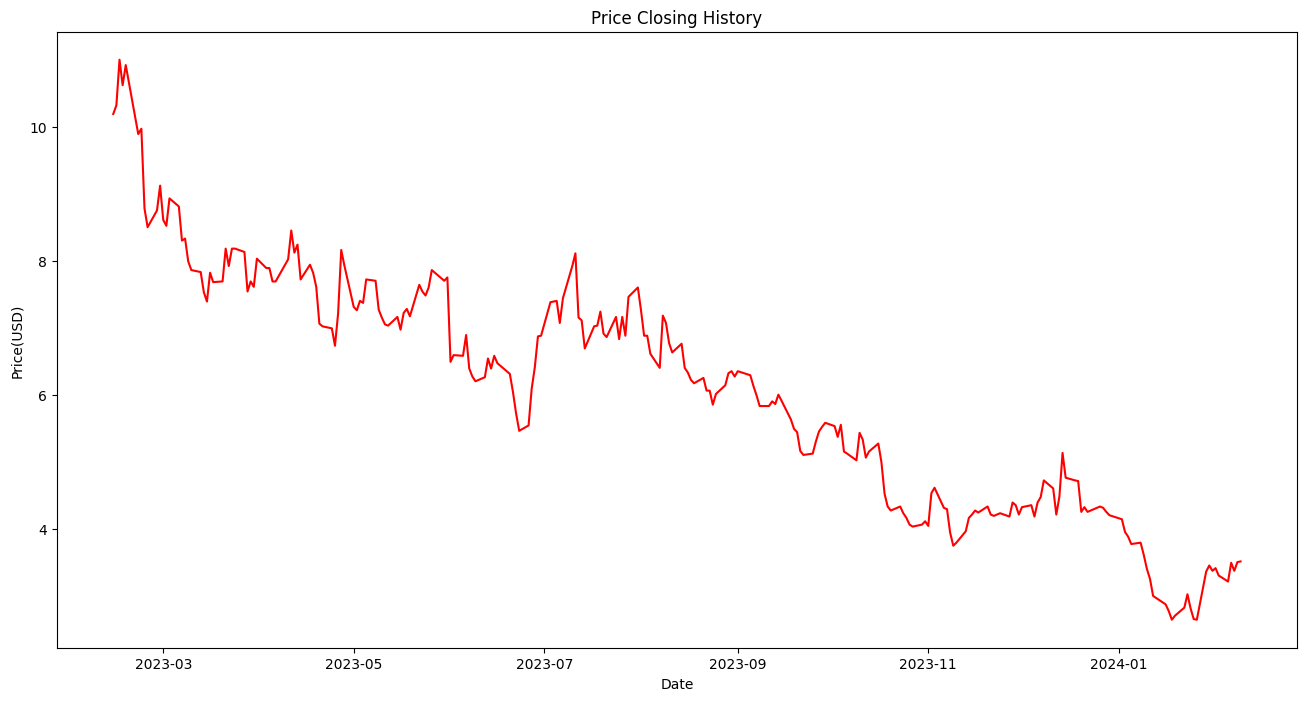

In [15]:
plt.figure(figsize=(16,8))
plt.plot(lucid_df['Close'], color='red')
plt.title('Price Closing History')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.show()

In [16]:
#Array
l_data = lucid_df.filter(['Close'])
l_dataset = l_data.values
training_data = math.ceil(len(l_dataset) *.8)
print(training_data)

200


In [21]:
# scaling data
l_scale = MinMaxScaler(feature_range=(0,1))
l_scaled_data = l_scale.fit_transform(l_dataset)
print(l_scaled_data)

[[0.90311005]
 [0.91866029]
 [1.        ]
 [0.95454545]
 [0.99043062]
 [0.86722488]
 [0.87679426]
 [0.73444976]
 [0.70095694]
 [0.73086124]
 [0.77511962]
 [0.71411483]
 [0.70334928]
 [0.75239234]
 [0.73803828]
 [0.67703349]
 [0.68062201]
 [0.63995215]
 [0.62440191]
 [0.6208134 ]
 [0.58492823]
 [0.56818182]
 [0.61961722]
 [0.60287081]
 [0.60406699]
 [0.66267943]
 [0.63157895]
 [0.66267943]
 [0.66267943]
 [0.65669856]
 [0.5861244 ]
 [0.60406699]
 [0.59449761]
 [0.64473684]
 [0.62799043]
 [0.62799043]
 [0.60406699]
 [0.60406699]
 [0.64354067]
 [0.69497608]
 [0.65550239]
 [0.66985646]
 [0.6076555 ]
 [0.63397129]
 [0.61961722]
 [0.59449761]
 [0.52870813]
 [0.52392344]
 [0.52033493]
 [0.48923445]
 [0.54665072]
 [0.66028708]
 [0.63277512]
 [0.55861244]
 [0.55263158]
 [0.56937799]
 [0.56578947]
 [0.6076555 ]
 [0.60526316]
 [0.55382775]
 [0.53947368]
 [0.52751196]
 [0.52511962]
 [0.54066986]
 [0.51794258]
 [0.54784689]
 [0.55502392]
 [0.54186603]
 [0.59808612]
 [0.5861244 ]
 [0.57894737]
 [0.59

In [22]:
data_train = l_scaled_data[0:training_data, :]
X_train = []
y_train = []
for i in range(60, len(data_train)):
  X_train.append(data_train[i-60:i, 0])
  y_train.append(data_train[i,0])
  if i<=60:
    print(X_train)
    print(y_train)

[array([0.90311005, 0.91866029, 1.        , 0.95454545, 0.99043062,
       0.86722488, 0.87679426, 0.73444976, 0.70095694, 0.73086124,
       0.77511962, 0.71411483, 0.70334928, 0.75239234, 0.73803828,
       0.67703349, 0.68062201, 0.63995215, 0.62440191, 0.6208134 ,
       0.58492823, 0.56818182, 0.61961722, 0.60287081, 0.60406699,
       0.66267943, 0.63157895, 0.66267943, 0.66267943, 0.65669856,
       0.5861244 , 0.60406699, 0.59449761, 0.64473684, 0.62799043,
       0.62799043, 0.60406699, 0.60406699, 0.64354067, 0.69497608,
       0.65550239, 0.66985646, 0.6076555 , 0.63397129, 0.61961722,
       0.59449761, 0.52870813, 0.52392344, 0.52033493, 0.48923445,
       0.54665072, 0.66028708, 0.63277512, 0.55861244, 0.55263158,
       0.56937799, 0.56578947, 0.6076555 , 0.60526316, 0.55382775])]
[0.5394736842105264]


In [28]:
# Conversity to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print(X_train.shape)

(140, 60, 1)


In [30]:
#LSTM Model
lstm_m = Sequential()
lstm_m.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_m.add(LSTM(62, return_sequences=False))
lstm_m.add(Dense(32))
lstm_m.add(Dense(1))
lstm_m.compile(optimizer='adam', loss='mean_squared_error')
lstm_m.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
140/140 [==============================] - 8s 32ms/step - loss: 0.0085
Epoch 2/10
140/140 [==============================] - 5s 33ms/step - loss: 0.0054
Epoch 3/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0038
Epoch 4/10
140/140 [==============================] - 5s 34ms/step - loss: 0.0030
Epoch 5/10
140/140 [==============================] - 4s 31ms/step - loss: 0.0029
Epoch 6/10
140/140 [==============================] - 4s 29ms/step - loss: 0.0027
Epoch 7/10
140/140 [==============================] - 5s 37ms/step - loss: 0.0033
Epoch 8/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0022
Epoch 9/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0024
Epoch 10/10
140/140 [==============================] - 5s 37ms/step - loss: 0.0021


In [34]:
# Testing
data_test = l_scaled_data[training_data-60:, :]
X_test = []
y_test = l_dataset[training_data:, :]
for i in range(60, len(data_test)):
  X_test.append(data_test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(50, 60, 1)

In [37]:
# Predicting
pred = lstm_m.predict(X_test)
pred = l_scale.inverse_transform(pred)

2/2 [==============================] - 0s 33ms/step


In [39]:
# RMSE = root mean square error
rmse = np.sqrt(np.mean(pred - y_test) ** 2)
print(rmse)

0.19966546897888182


<ipython-input-42-e852ba321a63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


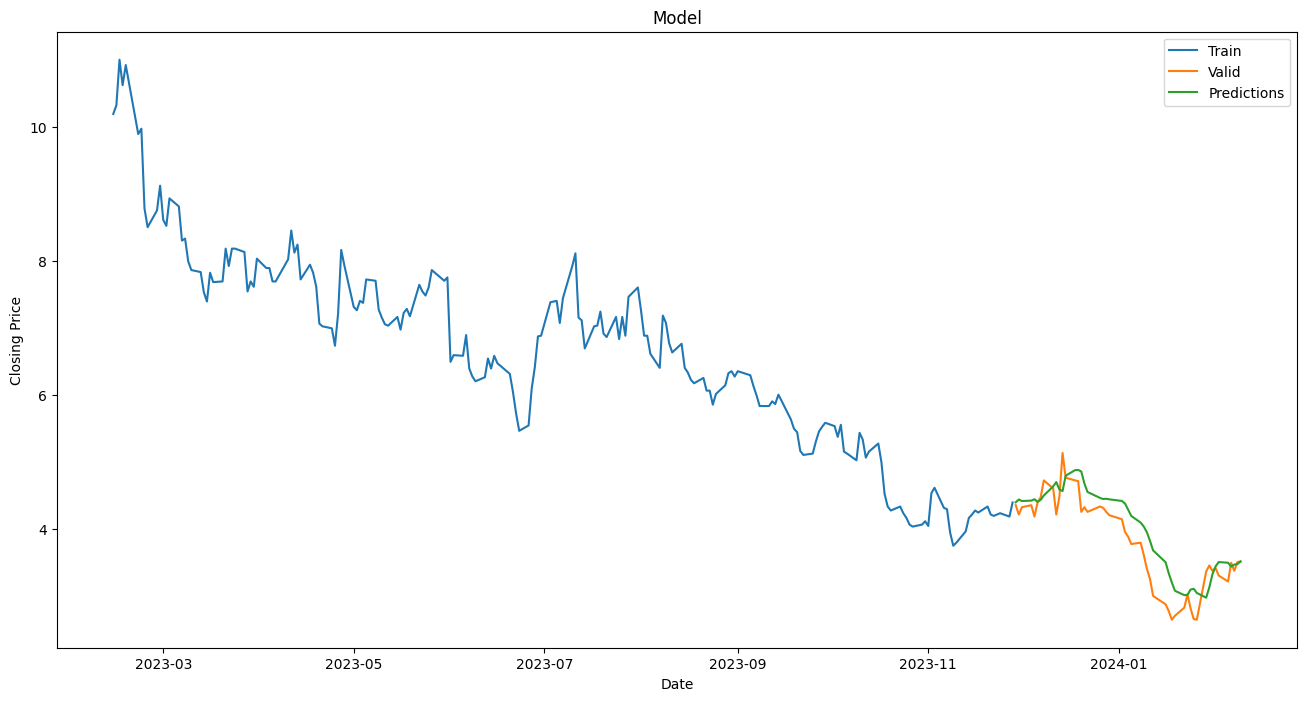

In [42]:
#plotting
train = l_data[:training_data]
valid = l_data[training_data:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Model')
plt.legend(['Train','Valid','Predictions'])

In [43]:
print(valid) #showing predicted and valid prices

            Close  Predictions
Date                          
2023-11-29  4.360     4.403370
2023-11-30  4.220     4.444745
2023-12-01  4.330     4.422032
2023-12-04  4.360     4.427726
2023-12-05  4.190     4.448623
2023-12-06  4.400     4.409726
2023-12-07  4.480     4.439909
2023-12-08  4.730     4.504303
2023-12-11  4.610     4.640124
2023-12-12  4.220     4.704621
2023-12-13  4.490     4.594152
2023-12-14  5.140     4.570352
2023-12-15  4.770     4.799292
2023-12-18  4.730     4.882977
2023-12-19  4.720     4.885839
2023-12-20  4.260     4.862711
2023-12-21  4.330     4.683177
2023-12-22  4.260     4.557002
2023-12-26  4.340     4.468292
2023-12-27  4.320     4.451365
2023-12-28  4.260     4.455735
2023-12-29  4.210     4.447079
2024-01-02  4.150     4.423318
2024-01-03  3.960     4.384907
2024-01-04  3.890     4.293938
2024-01-05  3.780     4.198905
2024-01-08  3.800     4.100435
2024-01-09  3.620     4.041768
2024-01-10  3.410     3.956436
2024-01-11  3.260     3.827626
2024-01-

In [45]:
lucid_quote = pd.read_csv('/content/LCID.csv')
new_l_df = lucid_quote.filter(['Close'])
last_few_days = new_l_df[-60:].values
last_few_days_scaled = l_scale.transform(last_few_days)
X_test = []
X_test.append(last_few_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = lstm_m.predict(X_test)
pred_price = l_scale.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 29ms/step
[[3.5579376]]
